In [13]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data.catalog import Metadata

In [14]:
keypoint_names = ['left_sleeve_1', 'left_sleeve_2', 'right_sleeve_1', 'right_sleeve_2']
thing_classes = ['shirt']
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.DEVICE = 'cpu'
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(thing_classes)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # bat
cfg.MODEL.RETINANET.NUM_CLASSES = 1
cfg.MODEL.ROI_KEYPOINT_HEAD.NUM_KEYPOINTS = len(keypoint_names)
cfg.TEST.KEYPOINT_OKS_SIGMAS = tuple(np.ones(len(keypoint_names), dtype=float).tolist())
metadata = Metadata()
metadata.set(thing_classes = thing_classes)

namespace(thing_classes=['shirt'])

# Inference on single Image

left_sleeve_1: x: 15.44062614440918, y: 206.16543579101562
left_sleeve_2: x: 73.15312957763672, y: 271.3763732910156
right_sleeve_1: x: 389.55938720703125, y: 205.65992736816406
right_sleeve_2: x: 326.27813720703125, y: 270.87091064453125


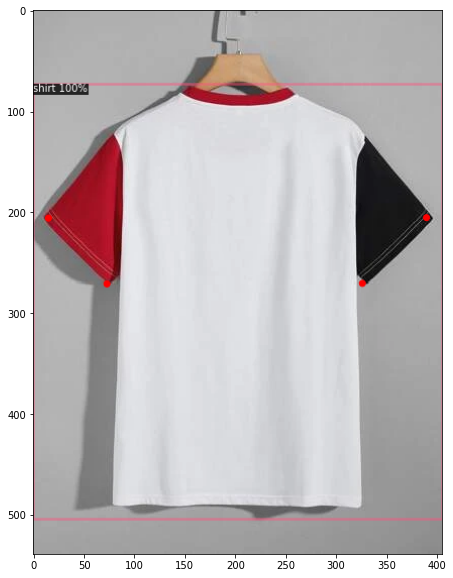

In [18]:
IMG_PATH = './test/1600392135edaaaeb9d17228737b87f8ef4d1ec0e8_thumbnail_405x552.jpg'
predictor = DefaultPredictor(cfg)
im = cv2.imread(img)
outputs = predictor(im)
instances = outputs["instances"].to("cpu")
kpts = instances.pred_keypoints.tolist()[0]
for i, kpt in enumerate(kpts):
    print(f'{keypoint_names[i]}: x: {kpt[0]}, y: {kpt[1]}')

v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=1)    # remove the colors of unsegmented pixels
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()
    

# Inference on Folder

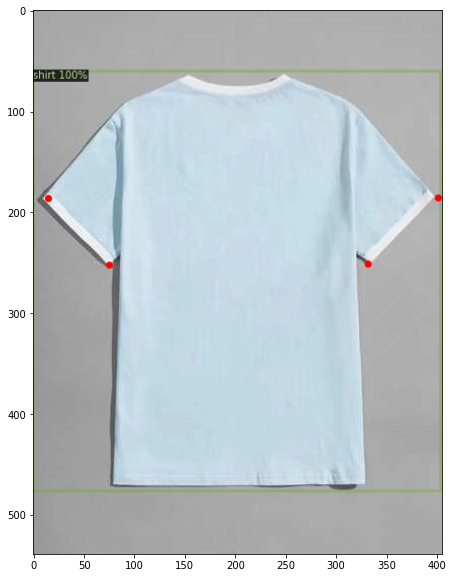

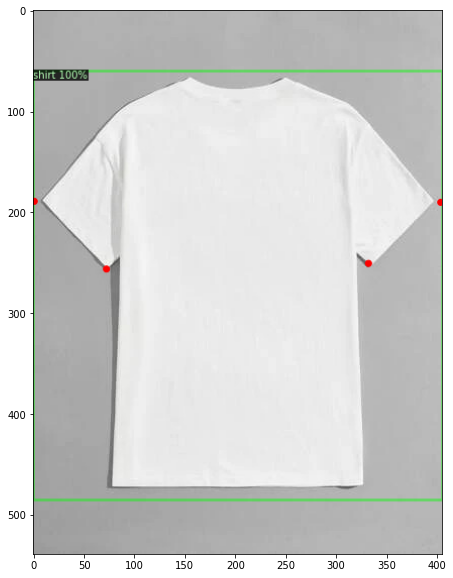

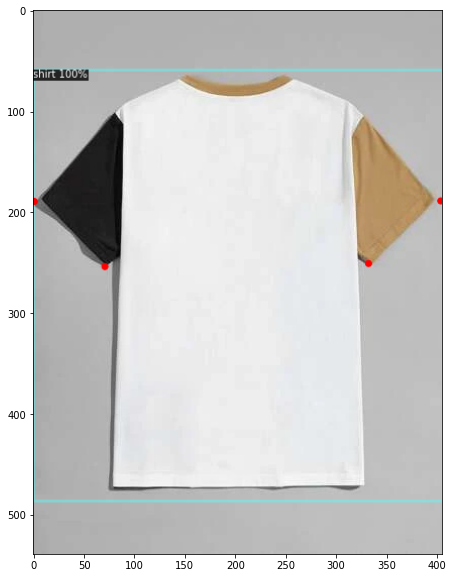

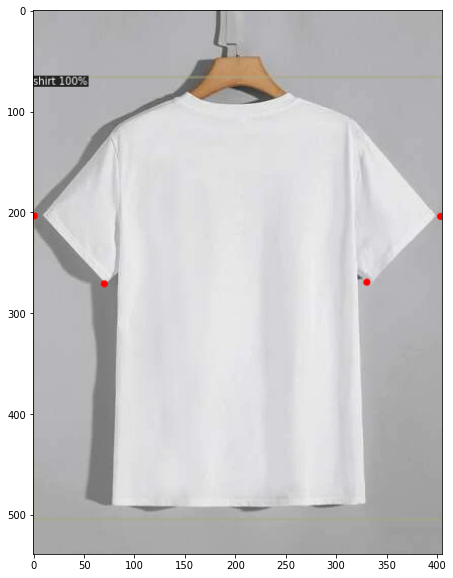

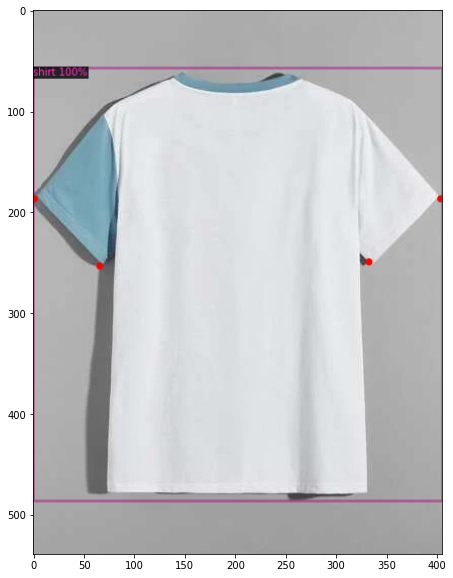

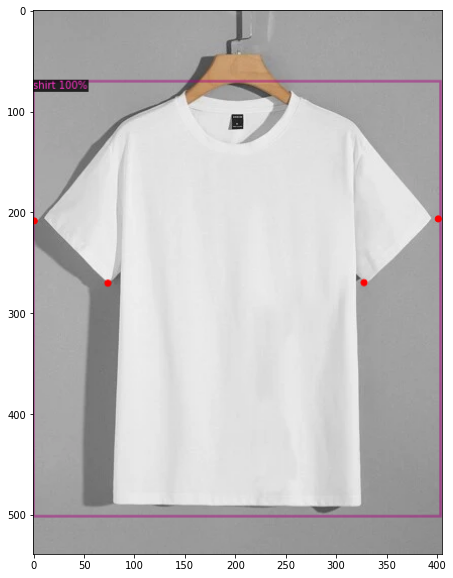

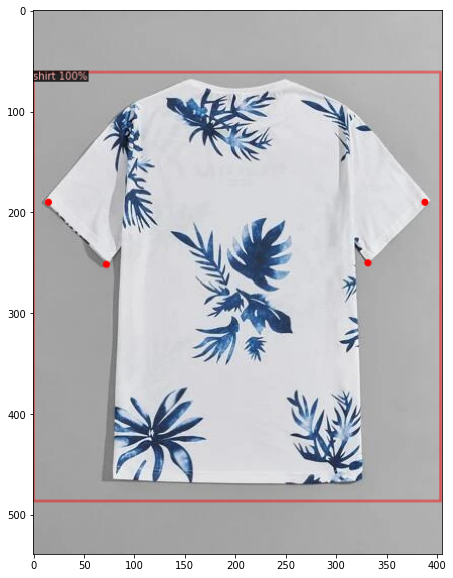

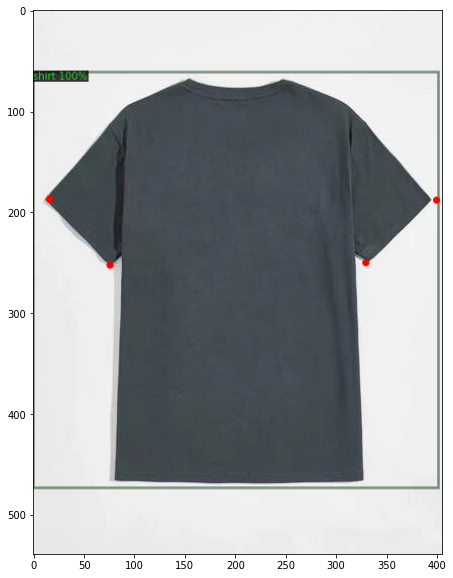

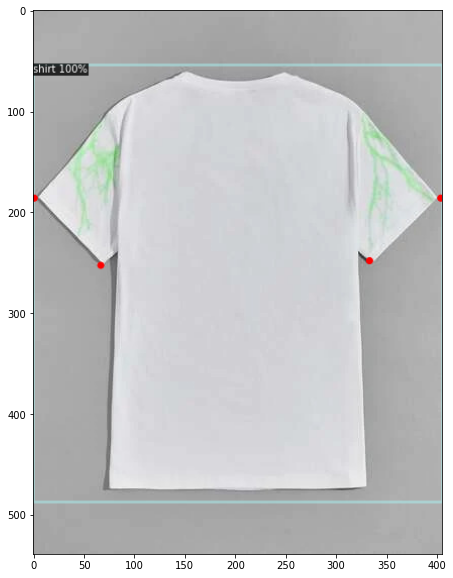

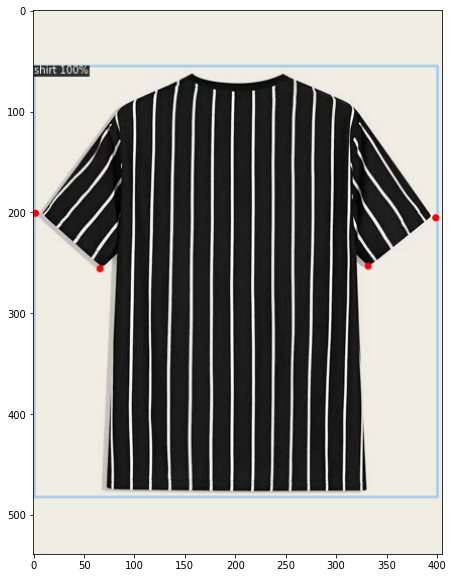

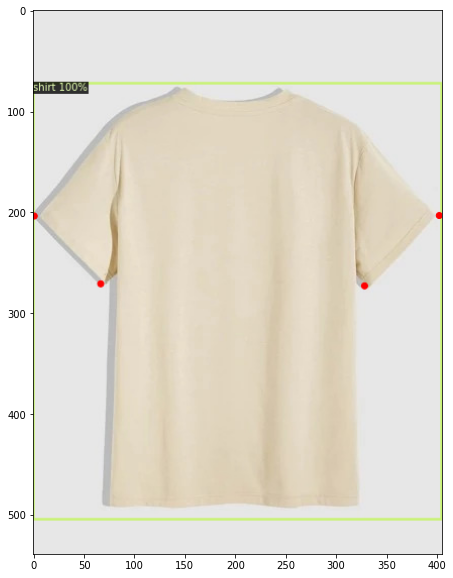

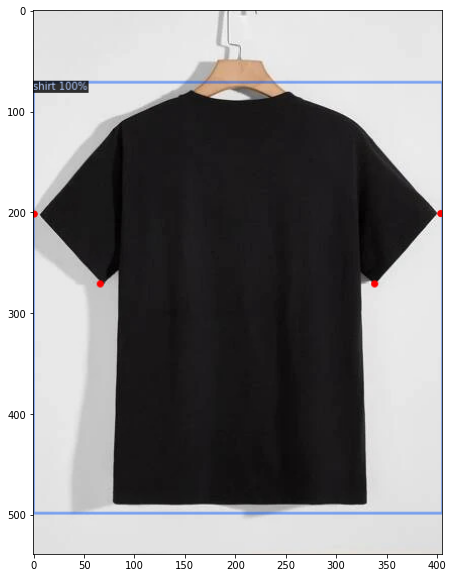

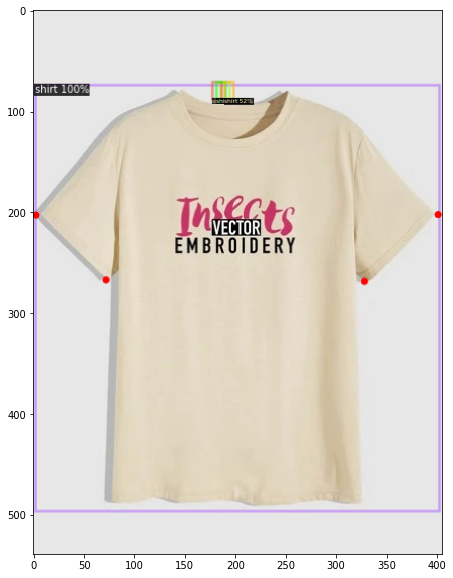

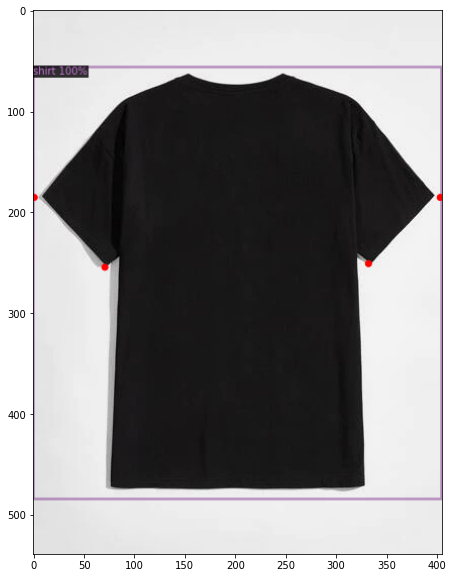

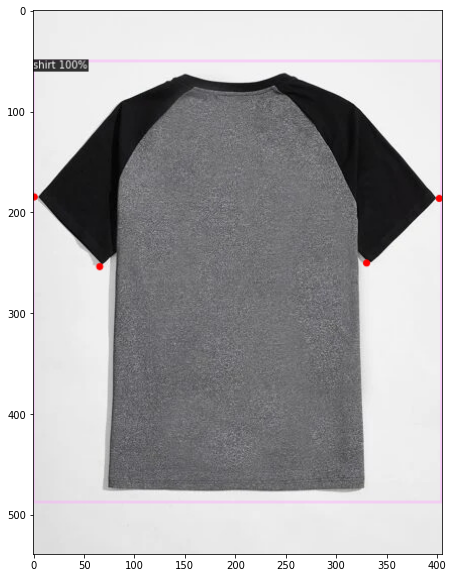

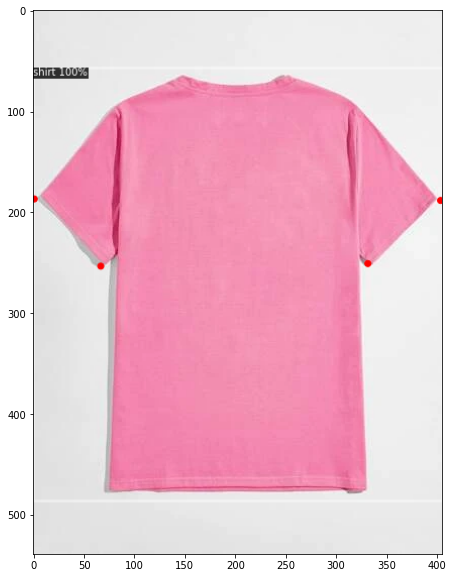

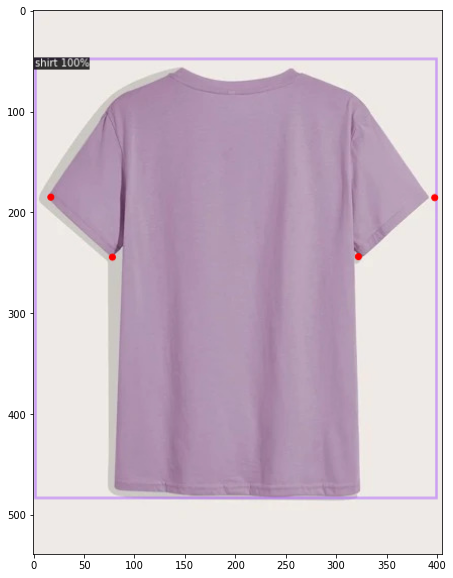

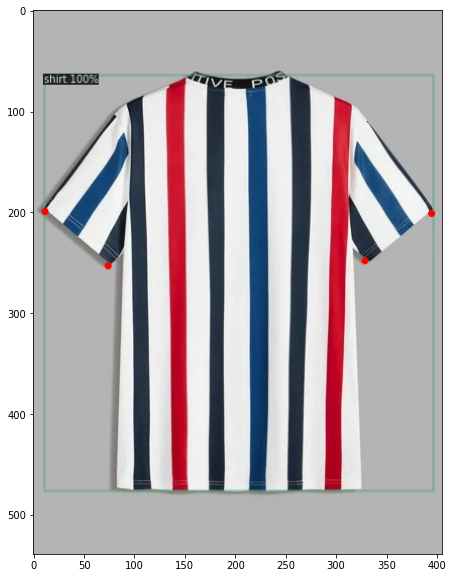

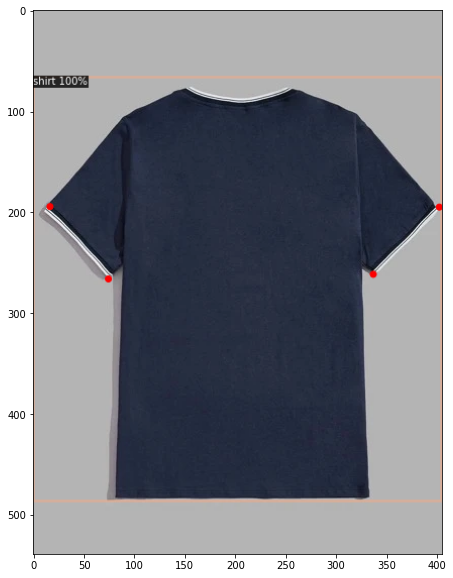

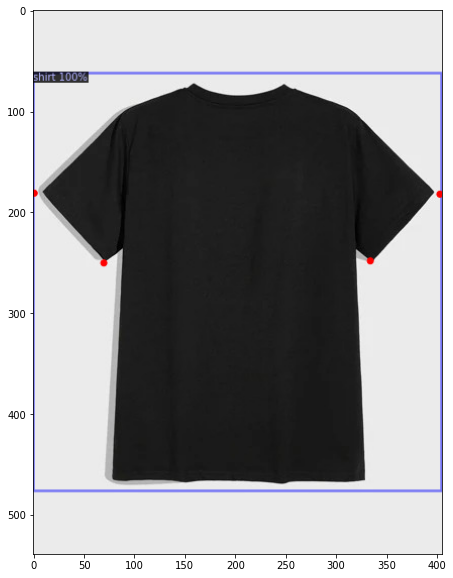

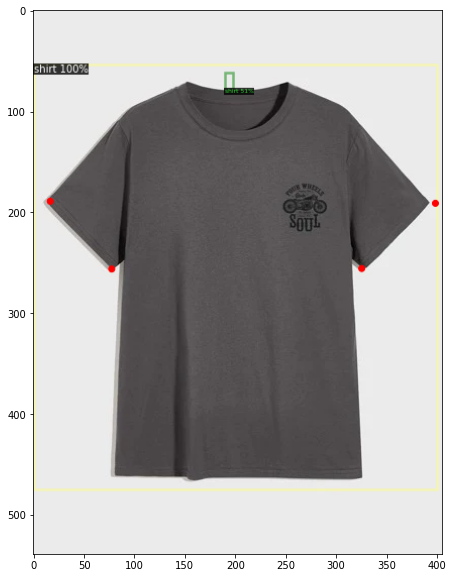

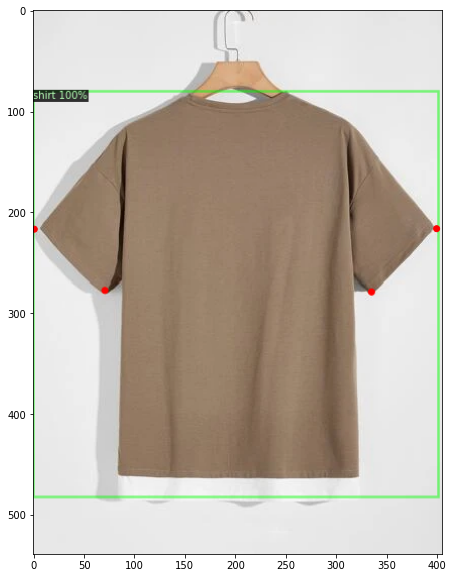

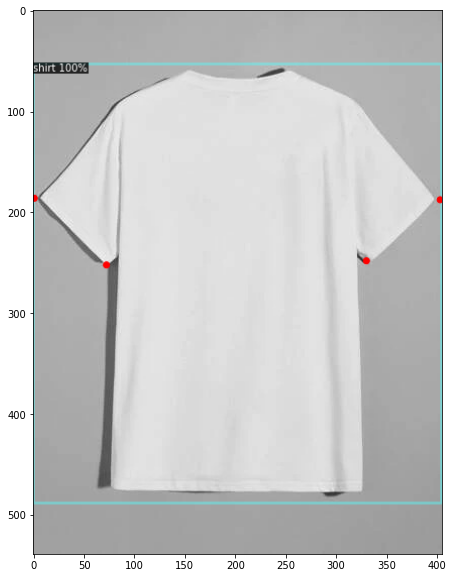

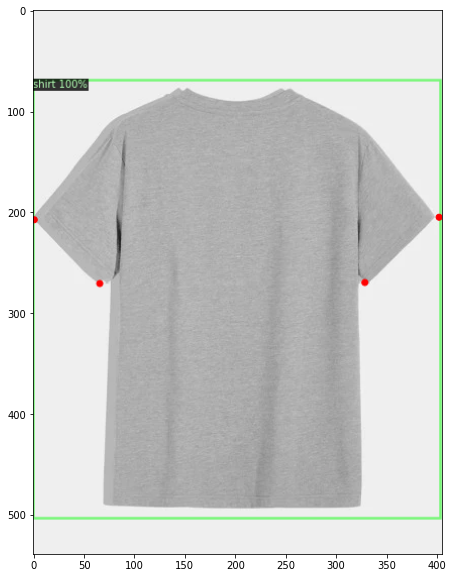

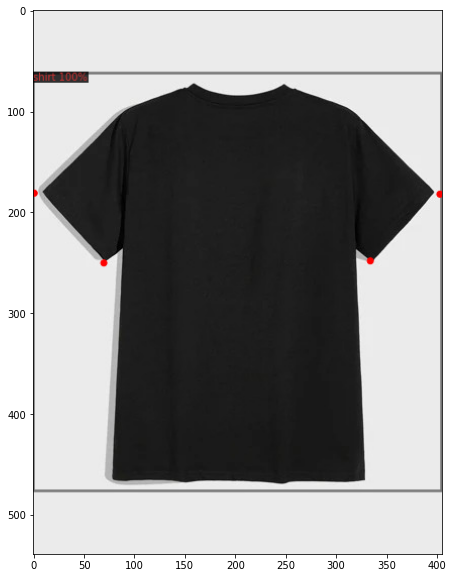

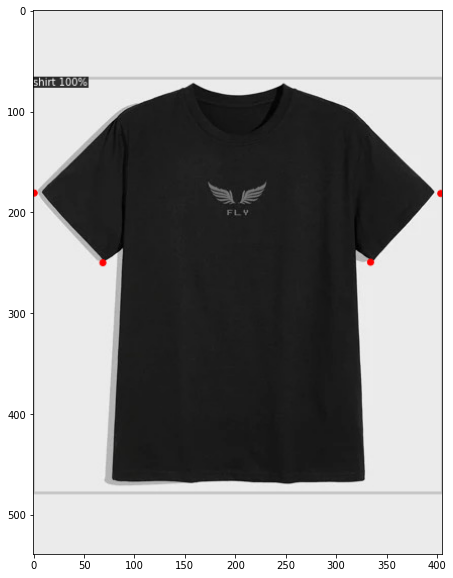

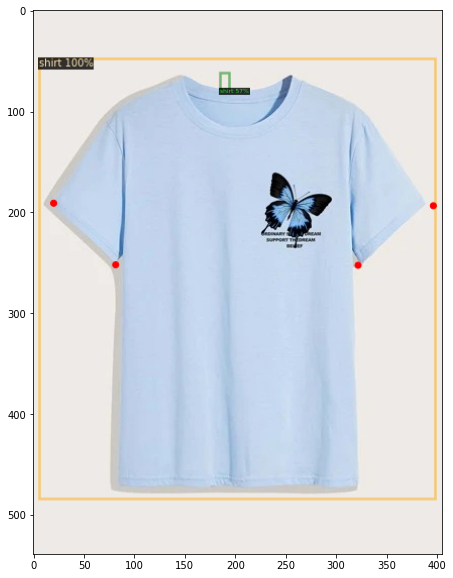

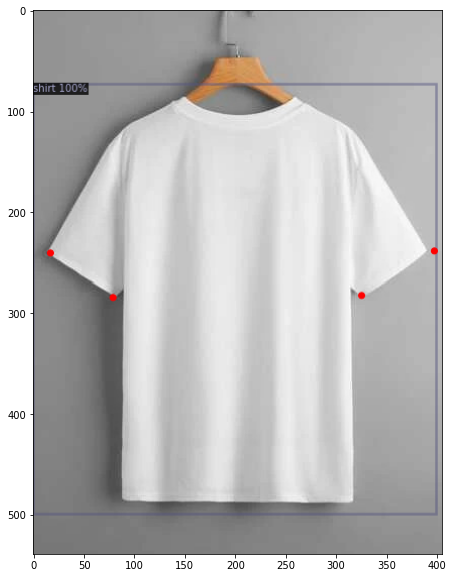

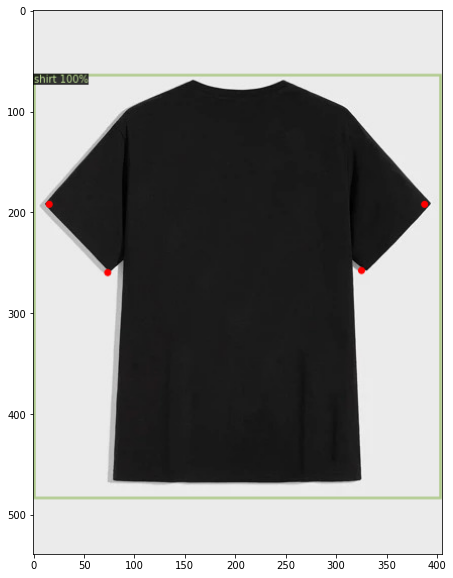

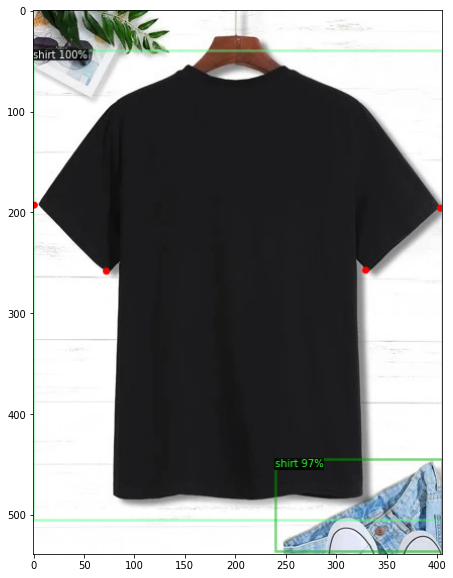

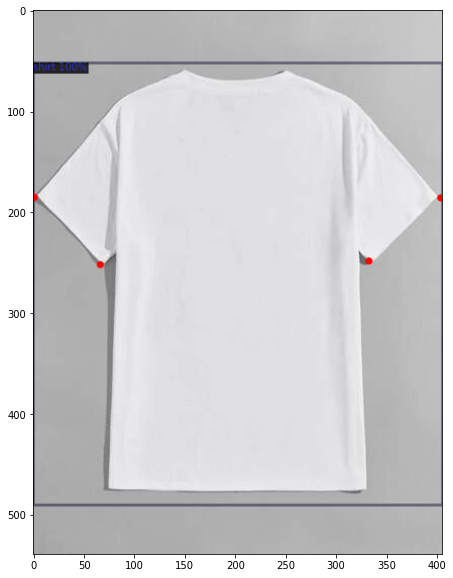

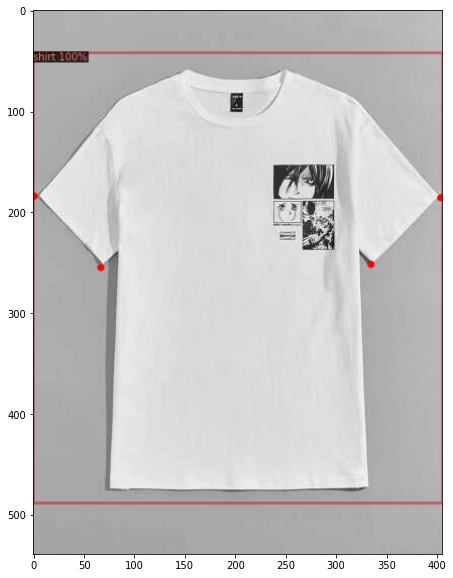

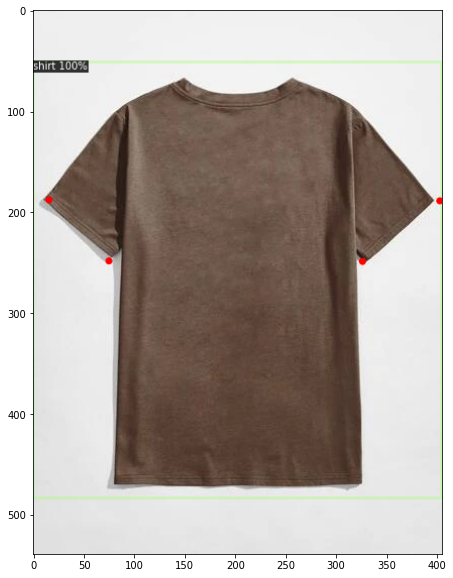

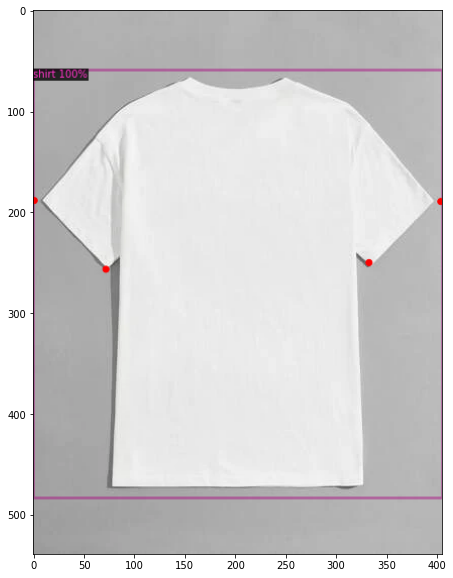

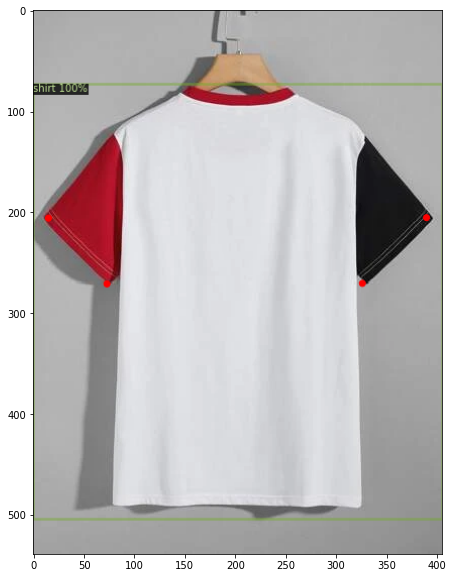

In [15]:
FOLDER_PATH = './test/'
predictor = DefaultPredictor(cfg)
for img in glob.glob(FOLDER_PATH+"*.jpg"):
    im = cv2.imread(img)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=1)    # remove the colors of unsegmented pixels
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()
